## Сравнение uniform и Xavier на MNIST

In [2]:
import torch 
import torchvision
import tqdm as notebook_tqdm
import torch.nn as nn

/Users/kodin/.pyenv/versions/3.8.13/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Загрузка данных

In [3]:
from torchvision import datasets as dts
from torchvision.transforms import ToTensor 


n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [4]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('data/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

### Смотрим на данные 

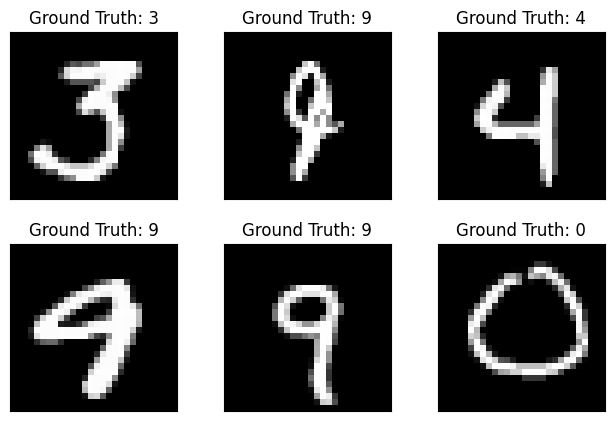

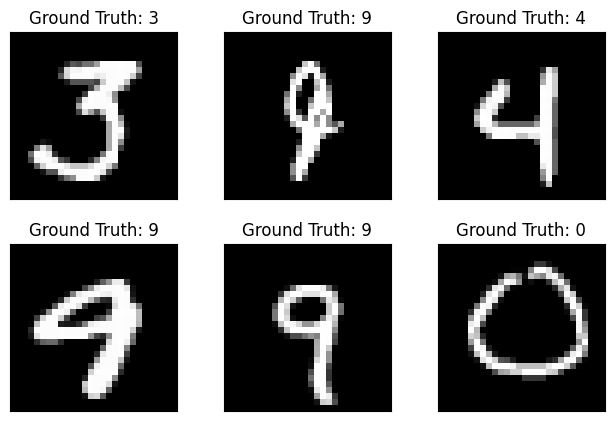

In [5]:
import matplotlib.pyplot as plt

examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure()
for i in range(6):
  plt.subplot(2, 3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [6]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from math import sqrt

### Модель с  uniform 

In [7]:

# созадем модель классивфикации изображений
class model_usual(nn.Module):
    def __init__(self):
        super( model_usual,self).__init__()
        self.linear1 = nn.Linear(28*28, 100) 
        self.linear2 = nn.Linear(100, 100) 
        self.linear3 = nn.Linear(100, 100) 
        self.linear4 = nn.Linear(100, 50) 
        self.final = nn.Linear(50, 10)

        nn.init.uniform_(self.linear1.weight, 0, 1/sqrt(5))
        nn.init.uniform_(self.linear2.weight, 0, 1/sqrt(5))
        nn.init.uniform_(self.linear3.weight, 0, 1/sqrt(5))
        nn.init.uniform_(self.linear4.weight, 0, 1/sqrt(5))
        
        self.tanh = nn.Tanh()

    def forward(self, image):
        a = image.view(-1, 28*28)
        a = self.tanh(self.linear1(a))
        a = self.tanh(self.linear2(a))
        a = self.tanh(self.linear3(a))
        a = self.tanh(self.linear4(a))
        a = self.final(a)
        return F.log_softmax(a)

model = model_usual()
print(model)

model_usual(
  (linear1): Linear(in_features=784, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=100, bias=True)
  (linear3): Linear(in_features=100, out_features=100, bias=True)
  (linear4): Linear(in_features=100, out_features=50, bias=True)
  (final): Linear(in_features=50, out_features=10, bias=True)
  (tanh): Tanh()
)


#### Обучение

In [8]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

In [9]:


# обучаем 
EPOCH = 30
train_losses = []
train_counter = []



count = 0
for e in range(EPOCH):
  for batch_idx, (data, target) in enumerate(train_loader):
    
    # фиксируем количество примеров 
    count+=1
    train_counter.append(count)
    
    optimizer.zero_grad()

    y_pred = model.forward(data)
    loss_vall =  F.nll_loss(y_pred, target)
    

    loss_vall.backward()
    optimizer.step()

    loss_vall = loss_vall.detach().numpy()

    if not e % 1000:
      print('Loss - ', loss_vall)
    
    train_losses.append(loss_vall)

/var/folders/tw/0xxcpj311px323qzr54yqgkr0000gn/T/ipykernel_76486/668619945.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(a)


Loss -  2.422525
Loss -  2.3436368
Loss -  2.355503
Loss -  2.2057517
Loss -  2.3216612
Loss -  2.148241
Loss -  2.2045126
Loss -  2.2698877
Loss -  2.2259727
Loss -  2.2694795
Loss -  2.3051603
Loss -  2.1499307
Loss -  2.3383853
Loss -  2.0787683
Loss -  2.2548752
Loss -  2.2875466
Loss -  2.2388678
Loss -  2.1915562
Loss -  2.1415794
Loss -  2.1718168
Loss -  2.2635934
Loss -  2.1848147
Loss -  2.199052
Loss -  2.2429943
Loss -  2.2674675
Loss -  2.2701535
Loss -  2.2354062
Loss -  2.1821887
Loss -  2.2096791
Loss -  2.161385
Loss -  2.3485565
Loss -  2.2306921
Loss -  2.1805537
Loss -  2.1174302
Loss -  2.2066095
Loss -  2.2550478
Loss -  2.2859566
Loss -  2.1615355
Loss -  2.168183
Loss -  2.124668
Loss -  2.265451
Loss -  2.2984622
Loss -  2.139826
Loss -  2.2871807
Loss -  2.190121
Loss -  2.2850232
Loss -  2.232966
Loss -  2.1728323
Loss -  2.1368825
Loss -  2.257833
Loss -  2.2208076
Loss -  2.1901262
Loss -  2.233737
Loss -  2.1993566
Loss -  2.2378
Loss -  2.1849318
Loss -  

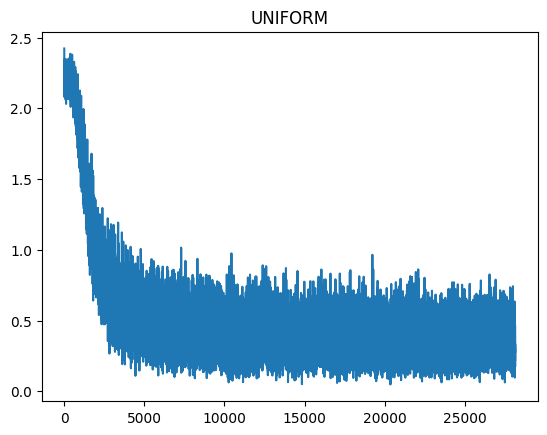

In [10]:
fig, ax = plt.subplots()  
ax.set_title('UNIFORM')
ax.plot(train_counter, train_losses)  

#### Результаты на тестовой выборке

In [11]:
model.eval()
test_losses = []
test_loss = 0
num  = []

cur = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
      cur+=1
      num.append(cur)
      
      output = model(data)
      
      test_loss += F.nll_loss(output, target, size_average=False).item()
      
      pred = output.data.max(1, keepdim=True)[1]
      
      correct += pred.eq(target.data.view_as(pred)).sum()
      
      test_loss /= len(test_loader.dataset)
      test_losses.append(test_loss)
      
      print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
      test_loss, correct, len(test_loader.dataset),
      100. * correct / len(test_loader.dataset)))

/var/folders/tw/0xxcpj311px323qzr54yqgkr0000gn/T/ipykernel_76486/668619945.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(a)
/Users/kodin/.pyenv/versions/3.8.13/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 0.0387, Accuracy: 893/10000 (9%)


Test set: Avg. loss: 0.0315, Accuracy: 1799/10000 (18%)


Test set: Avg. loss: 0.0321, Accuracy: 2712/10000 (27%)


Test set: Avg. loss: 0.0359, Accuracy: 3609/10000 (36%)


Test set: Avg. loss: 0.0344, Accuracy: 4511/10000 (45%)


Test set: Avg. loss: 0.0316, Accuracy: 5419/10000 (54%)


Test set: Avg. loss: 0.0369, Accuracy: 6319/10000 (63%)


Test set: Avg. loss: 0.0310, Accuracy: 7236/10000 (72%)


Test set: Avg. loss: 0.0393, Accuracy: 8126/10000 (81%)


Test set: Avg. loss: 0.0357, Accuracy: 9015/10000 (90%)



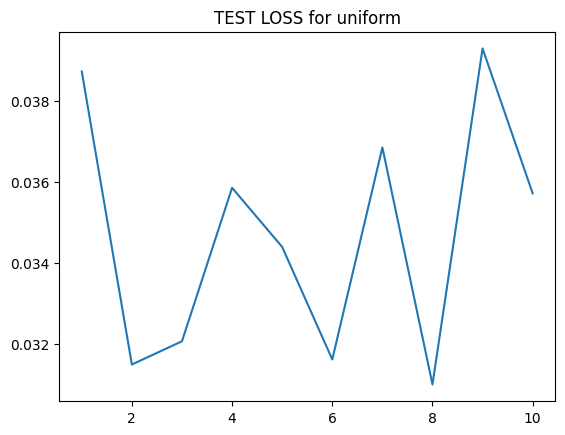

In [12]:
fig, ax = plt.subplots()  
ax.set_title('TEST LOSS for uniform')
ax.plot(num, test_losses)  

### Визуализируем резульат

In [13]:
import numpy as np
def predict(model, example):
    output = model.forward(example).detach().numpy()
    return np.argmax(output)

/var/folders/tw/0xxcpj311px323qzr54yqgkr0000gn/T/ipykernel_76486/668619945.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(a)


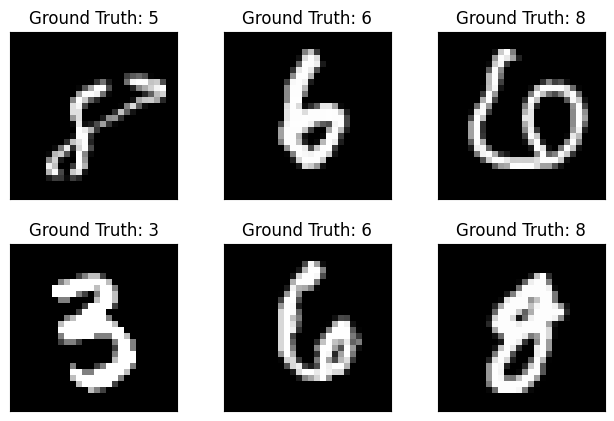

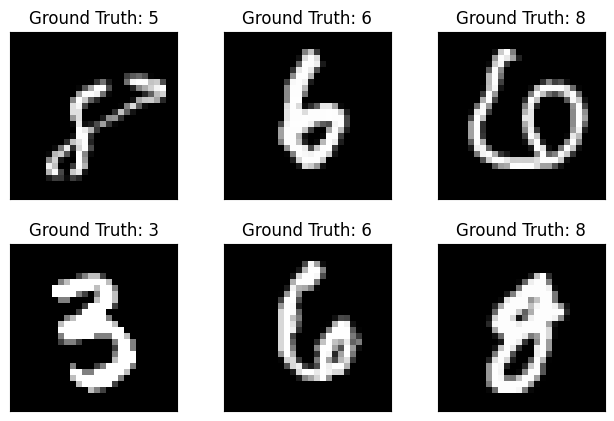

In [14]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure()
for i in range(6):
  plt.subplot(2, 3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(predict(model,example_data[i][0])))
  plt.xticks([])
  plt.yticks([])
fig

### Модель с инициализацией Xavier

In [15]:

# созадем модель классивфикации изображений
class model_xavier(nn.Module):
    def __init__(self):
        super( model_xavier,self).__init__()
        self.linear1 = nn.Linear(28*28, 100) 
        self.linear2 = nn.Linear(100, 100) 
        self.linear3 = nn.Linear(100, 100) 
        self.linear4 = nn.Linear(100, 50) 
        self.final = nn.Linear(50, 10)

        nn.init.xavier_uniform_(self.linear1.weight)
        nn.init.xavier_uniform_(self.linear2.weight)
        nn.init.xavier_uniform_(self.linear3.weight)
        nn.init.xavier_uniform_(self.linear4.weight)
        
        self.tanh = nn.Tanh()

    def forward(self, image):
        a = image.view(-1, 28*28)
        a = self.tanh(self.linear1(a))
        a = self.tanh(self.linear2(a))
        a = self.tanh(self.linear3(a))
        a = self.tanh(self.linear4(a))
        a = self.final(a)
        return F.log_softmax(a)

model_xavier = model_xavier()
print(model_xavier)

model_xavier(
  (linear1): Linear(in_features=784, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=100, bias=True)
  (linear3): Linear(in_features=100, out_features=100, bias=True)
  (linear4): Linear(in_features=100, out_features=50, bias=True)
  (final): Linear(in_features=50, out_features=10, bias=True)
  (tanh): Tanh()
)


### Обучение

In [16]:
optimizer_x = torch.optim.Adam(model_xavier.parameters(), lr=0.005)

In [17]:

# обучаем 
EPOCH = 30
train_losses_x = []
train_counter_x = []


count = 0
for e in range(EPOCH):
  for batch_idx, (data, target) in enumerate(train_loader):
    
    # фиксируем количество примеров 
    count+=1
    train_counter_x.append(count)
    
    optimizer_x.zero_grad()

    y_pred = model_xavier.forward(data)
    loss_vall =  F.nll_loss(y_pred, target)
    

    loss_vall.backward()
    optimizer_x.step()

    loss_vall = loss_vall.detach().numpy()

    if not e % 1000:
      print('Loss - ', loss_vall)
    
    train_losses_x.append(loss_vall)

Loss -  2.3317113
Loss -  2.2188857
Loss -  1.9229734
Loss -  1.7639956
Loss -  1.4840548
Loss -  1.3626752
Loss -  1.343546
Loss -  1.1767229
Loss -  1.1460272
Loss -  1.2460827
Loss -  0.9240185
Loss -  1.1042517
Loss -  0.7808336
Loss -  0.84840006
Loss -  0.85199857
Loss -  0.83757585
Loss -  0.973447
Loss -  0.8162127
Loss -  0.7355385
Loss -  0.6151598
Loss -  0.6017782
Loss -  0.5732914
Loss -  0.54664385
Loss -  0.6205161
Loss -  0.5447031
Loss -  0.5454855
Loss -  0.56174254
Loss -  0.47718686
Loss -  0.4980857
Loss -  0.68363905
Loss -  0.60462946
Loss -  0.62288076
Loss -  0.68752784
Loss -  0.74303544
Loss -  0.48748875
Loss -  0.69477534
Loss -  0.47666657


/var/folders/tw/0xxcpj311px323qzr54yqgkr0000gn/T/ipykernel_76486/3850764671.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(a)


Loss -  0.36218765
Loss -  0.2709184
Loss -  0.45561165
Loss -  0.6857843
Loss -  0.7064603
Loss -  0.8173159
Loss -  0.82393
Loss -  0.583331
Loss -  0.9210777
Loss -  0.6137225
Loss -  0.5249335
Loss -  0.531353
Loss -  0.55579937
Loss -  0.4342633
Loss -  0.62328917
Loss -  0.785912
Loss -  0.69964397
Loss -  0.5879125
Loss -  0.42302164
Loss -  0.35313502
Loss -  0.3285441
Loss -  0.4998916
Loss -  0.4087681
Loss -  0.47406876
Loss -  0.50142545
Loss -  0.37420267
Loss -  0.5845867
Loss -  0.33034155
Loss -  0.40416697
Loss -  0.33051562
Loss -  0.40805086
Loss -  0.55615634
Loss -  0.4094135
Loss -  0.3897299
Loss -  0.4748666
Loss -  0.44673702
Loss -  0.33958644
Loss -  0.2769312
Loss -  0.35894558
Loss -  0.31828395
Loss -  0.41446942
Loss -  0.3797646
Loss -  0.4773469
Loss -  0.41027364
Loss -  0.3195537
Loss -  0.4342582
Loss -  0.26115096
Loss -  0.3801861
Loss -  0.50032127
Loss -  0.4209477
Loss -  0.2690456
Loss -  0.40922746
Loss -  0.3416696
Loss -  0.38853726
Loss -  

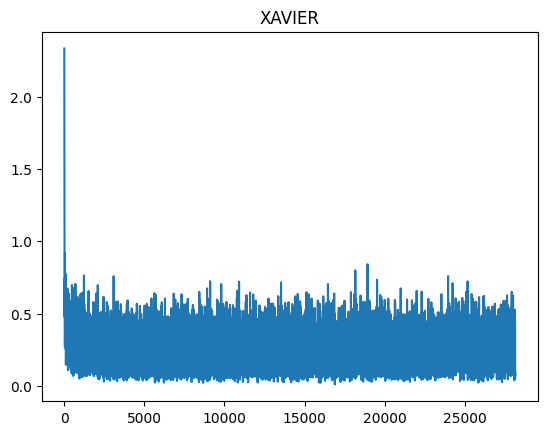

In [18]:
fig, ax = plt.subplots()  
ax.set_title('XAVIER')
ax.plot(train_counter_x, train_losses_x)  

### Сравниваем два метода инициализайии весов

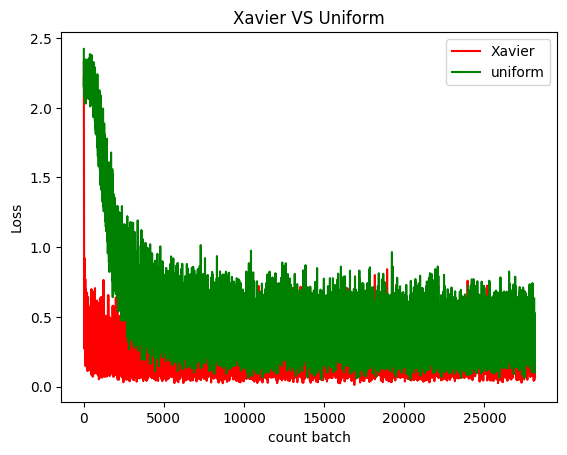

In [19]:

X = train_counter_x
  
# Assign variables to the y axis part of the curve
y = train_losses_x
z = train_losses
  
# Plotting both the curves simultaneously
plt.plot(X, y, color='r', label='Xavier')
plt.plot(X, z, color='g', label='uniform')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("count batch")
plt.ylabel("Loss")
plt.title("Xavier VS Uniform")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

### Видно, что с помощью метода Ксавье можно достич лучшей сходимости 

### Резултаты второй модели 

In [20]:
model_xavier.eval()

test_losses_x = []
num = []

test_loss = 0
correct = 0
cur = 0
with torch.no_grad():
    for data, target in test_loader:
      cur+=1
      num.append(cur)
      
      output = model_xavier(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
      
      test_loss /= len(test_loader.dataset)
      test_losses_x.append(test_loss)
      
      print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
      test_loss, correct, len(test_loader.dataset),
      100. * correct / len(test_loader.dataset)))

/var/folders/tw/0xxcpj311px323qzr54yqgkr0000gn/T/ipykernel_76486/3850764671.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(a)



Test set: Avg. loss: 0.0255, Accuracy: 922/10000 (9%)


Test set: Avg. loss: 0.0278, Accuracy: 1851/10000 (19%)


Test set: Avg. loss: 0.0237, Accuracy: 2780/10000 (28%)


Test set: Avg. loss: 0.0260, Accuracy: 3707/10000 (37%)


Test set: Avg. loss: 0.0212, Accuracy: 4641/10000 (46%)


Test set: Avg. loss: 0.0277, Accuracy: 5552/10000 (56%)


Test set: Avg. loss: 0.0279, Accuracy: 6473/10000 (65%)


Test set: Avg. loss: 0.0252, Accuracy: 7391/10000 (74%)


Test set: Avg. loss: 0.0274, Accuracy: 8309/10000 (83%)


Test set: Avg. loss: 0.0248, Accuracy: 9233/10000 (92%)



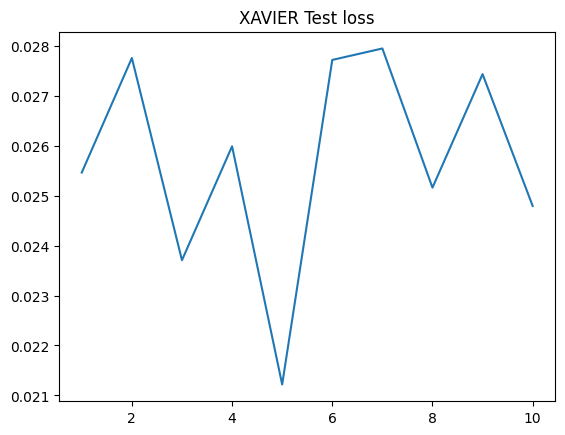

In [21]:
fig, ax = plt.subplots()  
ax.set_title('XAVIER Test loss')
ax.plot(num, test_losses_x)  

### Визуализируем резуьтат

/var/folders/tw/0xxcpj311px323qzr54yqgkr0000gn/T/ipykernel_76486/3850764671.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(a)


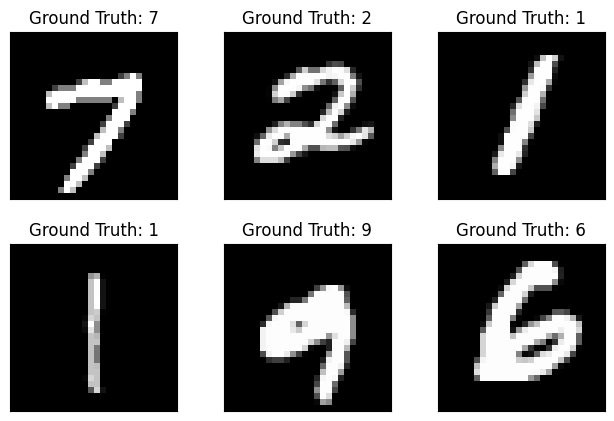

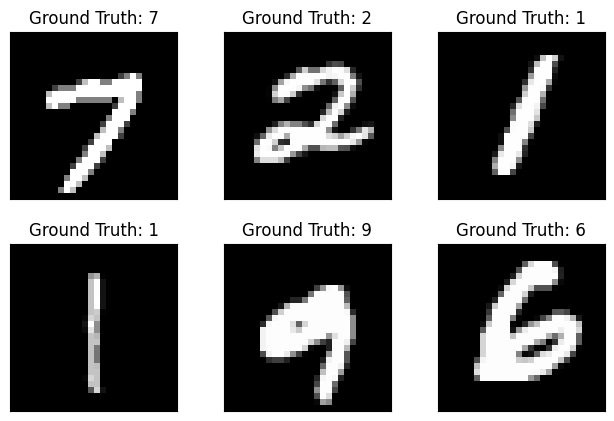

In [22]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure()
for i in range(6):
  plt.subplot(2, 3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(predict(model_xavier, example_data[i][0])))
  plt.xticks([])
  plt.yticks([])
fig